# <img src=images/continuum_analytics_b&w.png align="left" width="15%" style="margin-right:15%">

<h1 align='center'>Bokeh Tutorial</h1>

## 1.4 Plotting - Climate

**Exercise: Plot temperature anomaly monthly average for a given year and month by lat/lon with bokeh.plotting.image_rgba()**

- Data: 'data/Land_and_Ocean_LatLong1.nc'



*Note: For your convienience, I'm providing an RGBAColorMapper*

In [1]:
from utils.colormap import RGBAColorMapper

In [3]:
# Get the netCDF4 variable for temperature anomaly
import netCDF4

data = netCDF4.Dataset('data/Land_and_Ocean_LatLong1.nc')
t = data.variables['temperature']

In [4]:
# Initialize the colormap with a bokeh palette and the low and high values for the scale.
from bokeh.palettes import RdBu11
colormap = RGBAColorMapper(-6, 6, RdBu11)

In [5]:
# Write a function ``get_slice(temperature_variable, year, month)`` that given a temperature variable, year and month
# returns an array of rgba colors. (Hint: Use RGBAColorMapper.color()). 
def get_slice(t, year, month):
    i = (year - 1850)*12 + month - 1
    return colormap.color(t[i, :, :])

In [6]:
from bokeh.plotting import figure, output_notebook, show


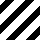
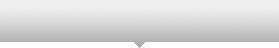
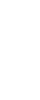
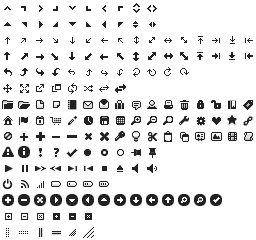
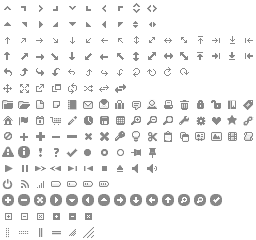
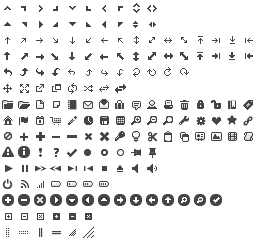
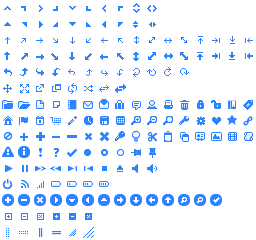
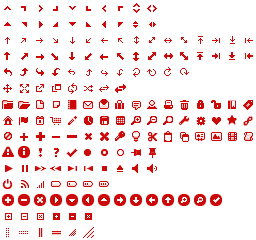
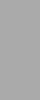
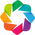
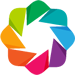
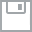
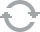
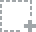
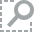
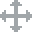
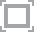
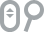

In [7]:
# Set output option
output_notebook()

In [8]:
# Get image data for a given year and month using the ``get_slice`` function
image = get_slice(t, 1950, 1)

In [9]:
# Create plot
# Tip: Make sure to set x_range and y_range appropriately
p =  figure(width=900, height=500, x_axis_type=None, y_axis_type=None, x_range=[-180,180], y_range=[-90,90])

p.image_rgba(
    image=[image],
    x=[-180], y=[-90],
    dw=[360], dh=[180], name='image'
)

In [10]:
# Show plot
show(p)

In [10]:
# Change the year and month and rerun the plot again.

**Exercise: Overlay the worldmap boundaries in the temperature image plot**

In [11]:
# Get worldmap data
import pandas as pd
import utils.world_countries as wc
world_countries = wc.data.copy()

worldmap = pd.DataFrame.from_dict(world_countries, orient='index')

In [12]:
# Create your plot
p =  figure(width=900, height=500, x_axis_type=None, y_axis_type=None, x_range=[-180,180], y_range=[-90,90])

p.image_rgba(
    image=[image],
    x=[-180], y=[-90],
    dw=[360], dh=[180], name='image'
)

p.patches(xs=worldmap['lons'], ys=worldmap['lats'], fill_color="white", fill_alpha=0,
    line_color="black", line_width=0.5)

In [13]:
# Show plot
show(p)